In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import squarify
import matplotlib.patches as Wedge
import colorcet as cc
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.io as pio

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Posição atual

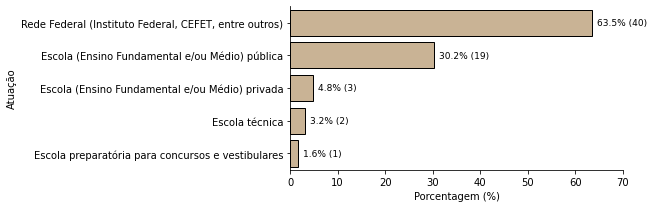

In [3]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.1_current_professor'].fillna('N/A'))
total = total[total['4.1_current_professor'] != 'N/A'][['4.1_current_professor']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.1_current_professor'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.1_current_professor', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Create a horizontal bar plot
plt.figure(figsize=(9, 3))

palette = sns.color_palette("Set3")

ax = sns.barplot(data=df, y='4.1_current_professor', x='percentage', color = 'tan',
                 edgecolor='black')

# Customize the plot
plt.xlabel("Porcentagem (%)")
plt.ylabel("Atuação")

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels to each bar
for i, row in df.iterrows():
    ax.text(row['percentage'] + 1, i, f"{row['percentage']}% ({row['count']})", color='black', va='center', fontsize=9)

plt.xlim(0, 70)
plt.tight_layout()
# plt.savefig('/.../Figure_6a.pdf')
plt.show()


# concursado

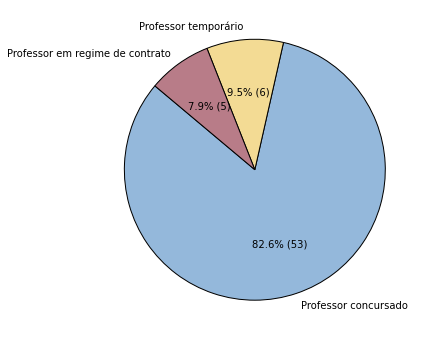

In [99]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.2_current_position'].fillna('N/A'))
total = total[total['4.2_current_position'] != 'N/A'][['4.2_current_position']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.2_current_position'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.2_current_position', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Function to lighten a color by blending it with white
def lighten_color(color, amount=0.5):
    return mcolors.to_rgba_array(color) * (1 - amount) + mcolors.to_rgba_array("white") * amount

# Define the original Tol Medium-Contrast colors
tol_medium_contrast_colors = [
    "#6699CC", "#EECC66", "#994455", "#997700",
    "#EE99AA", "#BBBBBB", "#77AADD", "#AA4488", "#DDDD77"
]

# Create a lighter (pale) version of the Tol Medium-Contrast colors
pale_tol_medium_contrast_colors = [lighten_color(color, 0.3)[0] for color in tol_medium_contrast_colors]

# Custom function to display percentage and count
def autopct_format(pct):
    total = df['count'].sum()
    count = int(pct * total / 100.0)
    return f'{pct:.1f}% ({count+1})'

# Use Seaborn to get the 'tab20' color palette
colors = sns.color_palette("Pastel1", len(df))

# Create pie chart with black edges and custom labels
plt.figure(figsize=(8, 6))
plt.pie(
    df['percentage'], 
    labels=df['4.2_current_position'], 
    autopct=autopct_format, 
    startangle=140,
    colors=pale_tol_medium_contrast_colors[:len(df)],  # Apply tab20 color palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Set edge color and width
)

# plt.savefig('/.../Figure_6b.pdf')
plt.show()


In [21]:
df

,4.2_current_position,count,percentage
0,Professor concursado,52,82.5
1,Professor temporário,6,9.5
2,Professor em regime de contrato,5,7.9


# início atuação

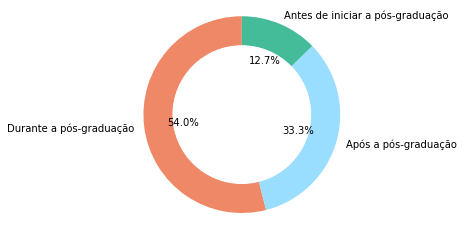

In [98]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.3_start_teaching_experience'].fillna('N/A'))
total = total[total['4.3_start_teaching_experience'] != 'N/A'][['4.3_start_teaching_experience']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.3_start_teaching_experience'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.3_start_teaching_experience', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))


# Tol Light colors (hex codes)
tol_light_colors = [
     "#EE8866",  "#99DDFF",
    "#44BB99", "#BBCC33", "#AAAA00", "#DDDDDD", "#DDDD77"
]


cmap = plt.get_cmap('Dark2')
custom_colors = cmap(np.linspace(0, 1, len(df)))

# Define a custom autopct function to show percentages in parentheses
def autopct_format(pct):
    return f'({pct:.1f}%)'

# Create a donut chart
labels = df['4.3_start_teaching_experience']
sizes = df['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.3), startangle=90, autopct='%1.1f%%', colors=tol_light_colors[:len(df)])

# Draw a circle in the center to make it a donut
center_circle = plt.Circle((0, 0), 0.70, color='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures the pie is drawn as a circle.
ax.axis('equal')

# Display the chart
# plt.savefig('/.../Figure_6c.pdf')
plt.show()



# licença doc

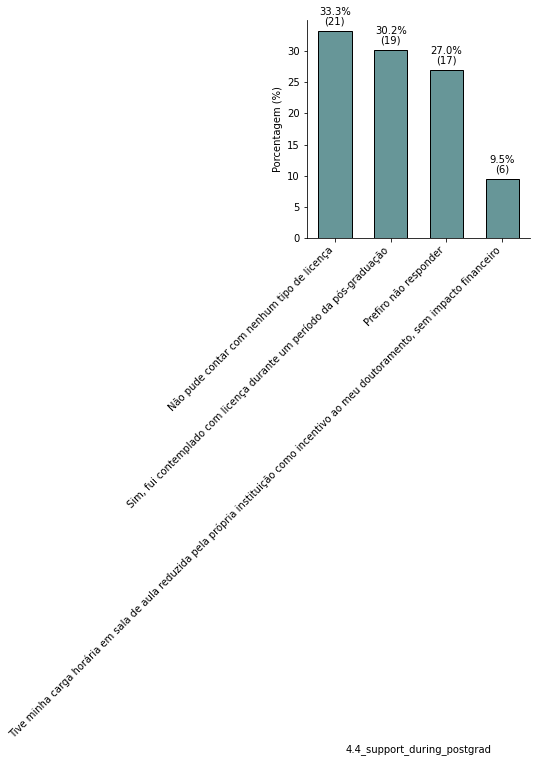

In [97]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.4_support_during_postgrad'].fillna('N/A'))
total = total[total['4.4_support_during_postgrad'] != 'N/A'][['4.4_support_during_postgrad']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.4_support_during_postgrad'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.4_support_during_postgrad', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))


# Creating a bar plot
plt.figure(figsize=(4, 4))
ax = sns.barplot(data=df, x='4.4_support_during_postgrad', y='percentage', 
                 width=0.6, color='cadetblue', edgecolor='black')
# plt.xlabel('Número de alunos orientados')
plt.ylabel('Porcentagem (%)')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 2.5, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_6d.pdf')

plt.show()


# Pos doc

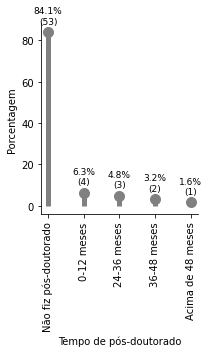

In [100]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.5_total_months_postdoc'].fillna('N/A'))
total = total[total['4.5_total_months_postdoc'] != 'N/A'][['4.5_total_months_postdoc']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.5_total_months_postdoc'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.5_total_months_postdoc', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Create the rotated lollipop plot
plt.figure(figsize=(3, 5))
plt.vlines(x=df['4.5_total_months_postdoc'], ymin=0, ymax=df['percentage'], color='gray', linewidth = 5)
plt.plot(df['4.5_total_months_postdoc'], df['percentage'], "o", color="gray", markersize=10)

# Customize the plot
plt.ylabel('Porcentagem')
plt.xlabel('Tempo de pós-doutorado')
plt.xticks(rotation=90)

# Add annotations with percentage and count above each dot
for i, row in df.iterrows():
    plt.text(
        row['4.5_total_months_postdoc'], row['percentage'] + 3,  # Adjust the vertical position slightly above the dot
        f"{row['percentage']}%\n({row['count']})",  # Format as "percentage% (count)"
        ha='center', va='bottom', fontsize=9
    )

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
# plt.savefig('/.../Figure_6e.pdf')
plt.show()

# instutuição

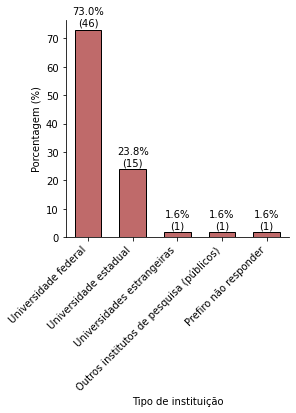

In [112]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.6_institutions_postgrad'].fillna('N/A'))
total = total[total['4.6_institutions_postgrad'] != 'N/A'][['4.6_institutions_postgrad']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.6_institutions_postgrad'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.6_institutions_postgrad', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))


# Creating a bar plot
plt.figure(figsize=(4, 4))
ax = sns.barplot(data=df, x='4.6_institutions_postgrad', y='percentage', 
                 width=0.6, color='indianred', edgecolor='black')
# plt.xlabel('Número de alunos orientados')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Tipo de instituição')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 5.5, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1.5, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_6f.pdf')

plt.show()

# financiamento doc

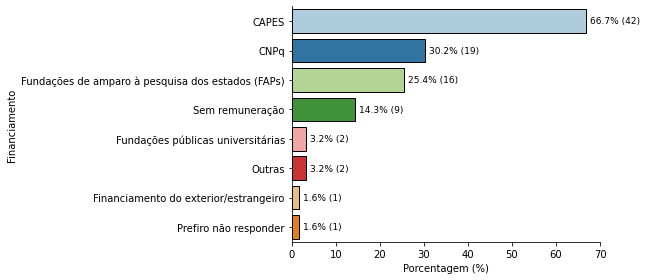

In [116]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.7_funding_postgrad_postdoc'].fillna('N/A'))
total = total[total['4.7_funding_postgrad_postdoc'] != 'N/A'][['4.7_funding_postgrad_postdoc']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.7_funding_postgrad_postdoc'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.7_funding_postgrad_postdoc', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by='percentage', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(9, 4))

palette = sns.color_palette("Paired")

ax = sns.barplot(data=df, y='4.7_funding_postgrad_postdoc', x='percentage', palette = sns.color_palette("Paired"),
                 edgecolor='black')

# Customize the plot
plt.xlabel("Porcentagem (%)")
plt.ylabel("Financiamento")

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels to each bar
for i, row in df.iterrows():
    ax.text(row['percentage'] + 1, i, f"{row['percentage']}% ({row['count']})", color='black', va='center', fontsize=9)

plt.tight_layout()
# plt.savefig('/.../Figure_6g.pdf')
plt.show()


# alunos

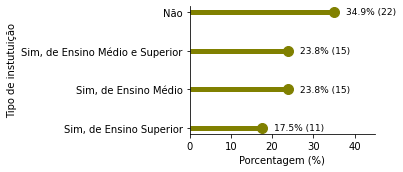

In [5]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.10_bolsist_students'].fillna('N/A'))
total = total[total['4.10_bolsist_students'] != 'N/A'][['4.10_bolsist_students']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.10_bolsist_students'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.10_bolsist_students', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by='percentage', ascending=True)

# Create the vertical lollipop plot
plt.figure(figsize=(5.5, 2.5))
plt.hlines(y=df['4.10_bolsist_students'], xmin=0, xmax=df['percentage'], color='olive', linewidth=5)
plt.plot(df['percentage'], df['4.10_bolsist_students'], "o", color="olive", markersize=10)

# Customize the plot
plt.xlabel('Porcentagem (%)')
plt.ylabel('Tipo de instutuição')
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal

# Add annotations with percentage and count to the right of each dot
for i, row in df.iterrows():
    plt.text(
        row['percentage'] + 3, row['4.10_bolsist_students'],  # Adjust horizontal position slightly to the right
        f"{row['percentage']}% ({row['count']})",  # Format as "percentage% (count)"
        ha='left', va='center', fontsize=9
    )

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.xlim(0, 45)
plt.tight_layout()
# plt.savefig('/.../Figure_6h.pdf')
plt.show()


# alunos

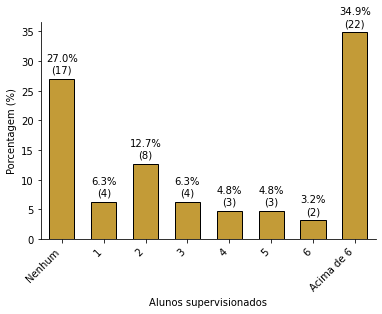

In [154]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.11_total_supervised_students'].fillna('N/A'))
total = total[total['4.11_total_supervised_students'] != 'N/A'][['4.11_total_supervised_students']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.11_total_supervised_students'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.11_total_supervised_students', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by='4.11_total_supervised_students', ascending=True)

# Define the desired order
category_order = [
    'Nenhum',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    'Acima de 6'
]

# Convert the column to a categorical type with the specified order
df['4.11_total_supervised_students'] = pd.Categorical(df['4.11_total_supervised_students'], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by='4.11_total_supervised_students')


# Creating a bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df, x='4.11_total_supervised_students', y='percentage', 
                 width=0.6, color='goldenrod', edgecolor='black')
plt.xlabel('Alunos supervisionados')
plt.ylabel('Porcentagem (%)')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding labels based on the actual positions of the bars
for bar, (index, row) in zip(ax.patches, df.iterrows()):
    # Get the height of the bar for correct positioning
    height = bar.get_height()
    percentage = row['percentage']
    count = row['count']
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3.0, f'{percentage}%', 
            ha='center', color='black')
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1.0, f'({count})', 
            ha='center', color='black')

# plt.savefig('/.../Figure_6i.pdf')

plt.show()


# possibilidade pesquisa

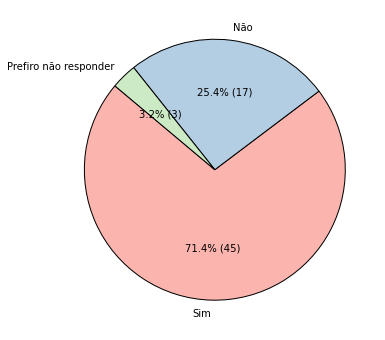

In [156]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')

total = pd.DataFrame(df['4.9_opportunity_research_extension'].fillna('N/A'))
total = total[total['4.9_opportunity_research_extension'] != 'N/A'][['4.9_opportunity_research_extension']]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df['4.9_opportunity_research_extension'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = ['4.9_opportunity_research_extension', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))


# Custom function to display percentage and count
def autopct_format(pct):
    total = df['count'].sum()
    count = int(pct * total / 100.0)
    return f'{pct:.1f}% ({count+1})'

# Use Seaborn to get the 'tab20' color palette
colors = sns.color_palette("Pastel1", len(df))

# Create pie chart with black edges and custom labels
plt.figure(figsize=(8, 6))
plt.pie(
    df['percentage'], 
    labels=df['4.9_opportunity_research_extension'], 
    autopct=autopct_format, 
    startangle=140,
    colors=colors,  # Apply tab20 color palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Set edge color and width
)


# plt.savefig('/.../Figure_6j.pdf')
plt.show()
